## 1. 문제정의
- 생존자와 사망자를 예측해보자

## 2. 데이터 수집

# Cabin 결측치 채우기

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape
train.columns, test.columns
train.head()
test.head()
train.info()
test.info()
train.describe()
train['Embarked'].info()
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace = True)
test['Fare'].info()
test['Fare'].describe()
test['Fare'].fillna(14.45, inplace = True)
train['Age'].info()
train.corr()
age_table = train[['Pclass','Sex', 'Age']].groupby(by =[ 'Pclass', 'Sex']).median()
train.iloc[17]
age_table.loc[3,'female'].values[0]
import numpy as np
def fill_age(person):
    if np.isnan(person['Age']): # 결측치다
        return age_table.loc[person['Pclass'],person['Sex']].values[0]
    else:
        return person['Age']
train['Age'] = train.apply(fill_age, axis = 1)
test['Age'] = train.apply(fill_age, axis = 1)
train.info()
train['Cabin'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_13384\4122342754.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [2]:
# 종류가 너무 많기 때문에 앞글자 하나씩만 따오기

In [3]:
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0] 

In [4]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [5]:
test['Cabin'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [6]:
# 전체 891개의 데이터 중 204개만 데이터가 들어가있었음
# 결측치가 687개 존재
# 204개로 687개의 결측치르르 채우는게 애매한 상황

In [7]:
# 결측치 자체를 하나의 데이터로 생각
train['Cabin'].fillna('N', inplace = True)
test['Cabin'].fillna('N', inplace = True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. 탐색적 데이터 분석

In [9]:
import seaborn as sns

In [10]:
# matplotlib : 설정할게 많다. > 다루기 어렵지만 자세하게 다룰 수 있다.
# seaborn : 설정할 게 많지 않다. > 다루기 쉽지만 자세하게 다룰 순 없다.

<Axes: xlabel='Cabin', ylabel='count'>

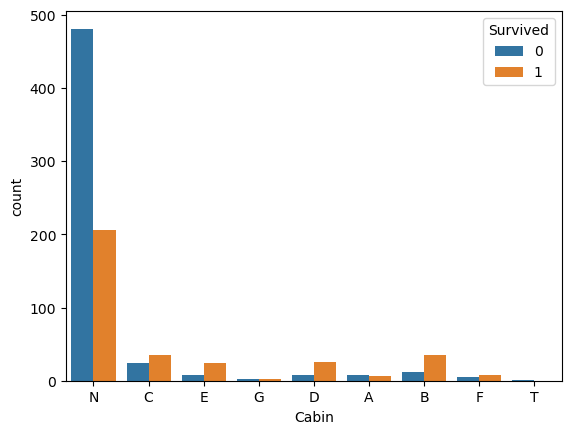

In [11]:
sns.countplot(data=train, x= 'Cabin', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='count'>

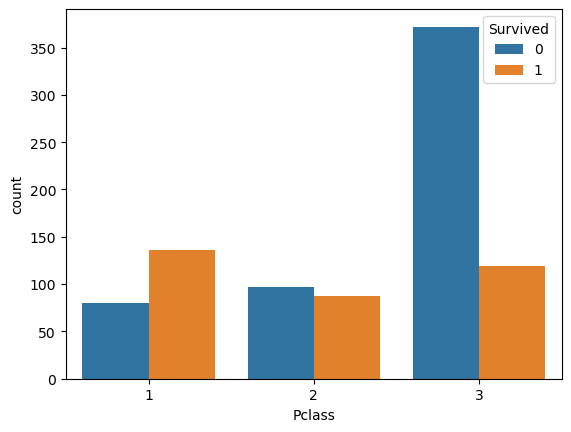

In [12]:
sns.countplot(data=train, x= 'Pclass', hue = 'Survived')

<Axes: xlabel='Cabin', ylabel='count'>

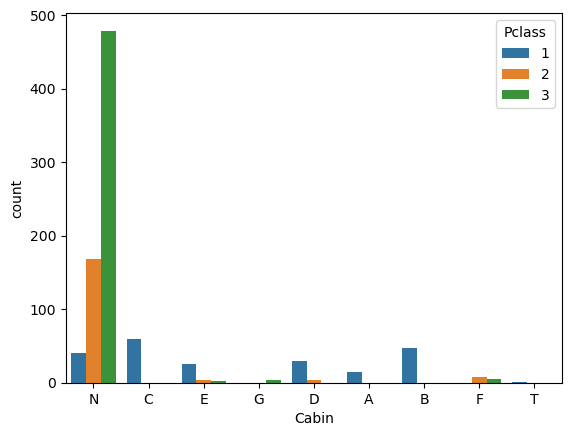

In [13]:
# Cabin과 Pclass 시각화
sns.countplot(data = train, x = 'Cabin', hue = 'Pclass')
# Cabin이 결측치였던 사람들은 3등급에 탑승한 사람이 많고 생존확률이 낮다

<Axes: xlabel='Sex', ylabel='count'>

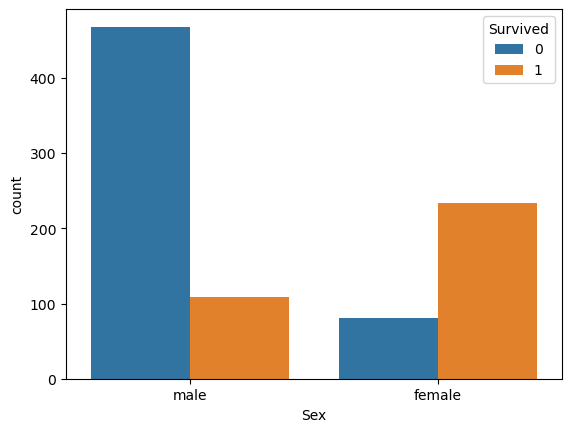

In [14]:
# Sex 시각화
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

In [15]:
# 범주형 컬럼
# 데이터의 갯수가 적은 컬럼(나이, 요금 제외)
# Embarked

<Axes: xlabel='Embarked', ylabel='count'>

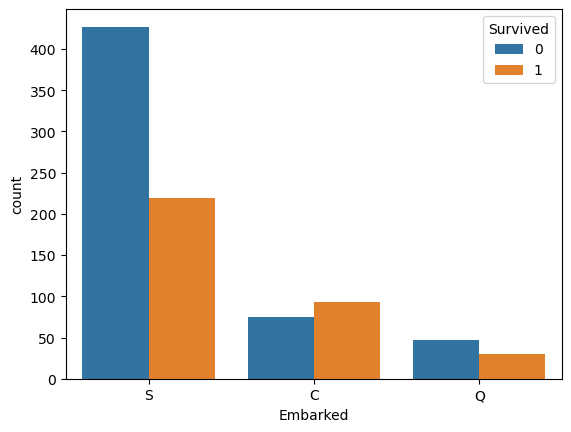

In [16]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

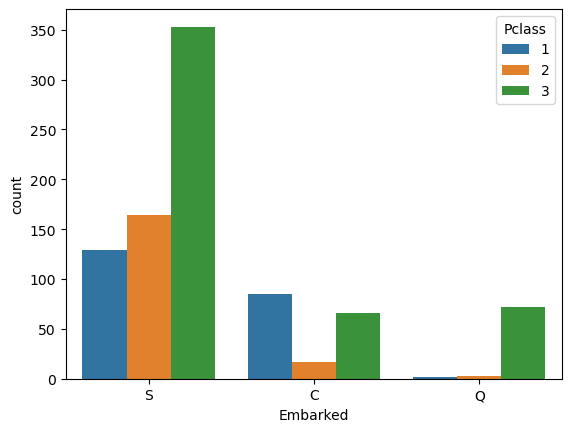

In [17]:
sns.countplot(data = train, x = 'Embarked', hue= 'Pclass')

In [18]:
# 수치형 데이터 시각화
# 빈도를 볼 수 있는 그래프로 확인
# violinplot : 빈도를 볼 수 있는 그래프

<Axes: xlabel='Sex', ylabel='Age'>

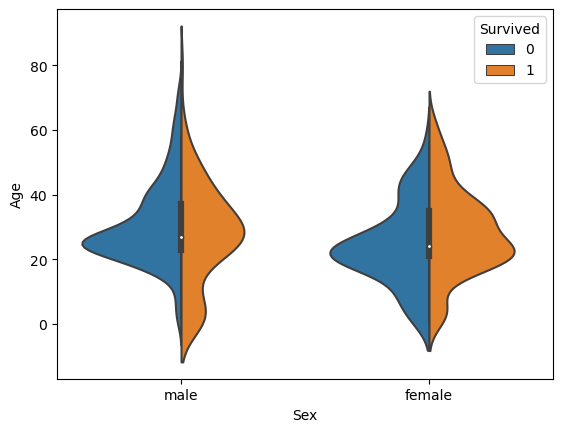

In [19]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True)

<Axes: xlabel='Sex', ylabel='Fare'>

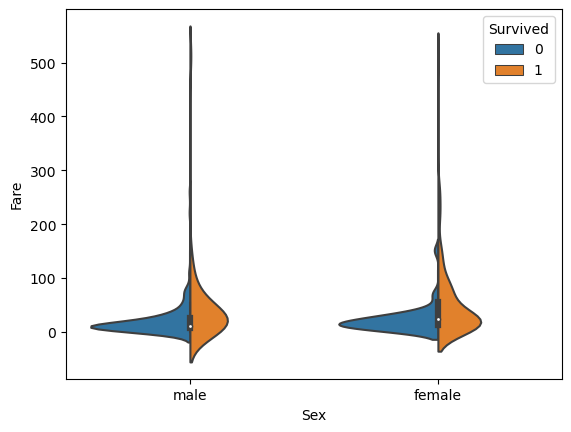

In [20]:
# 성별, 요금, 생존
sns.violinplot(data = train, x = 'Sex', y = 'Fare', hue = 'Survived', split = True)

In [21]:
# SibSp(형제, 자매), Parch(부모, 자식)

<Axes: xlabel='SibSp', ylabel='count'>

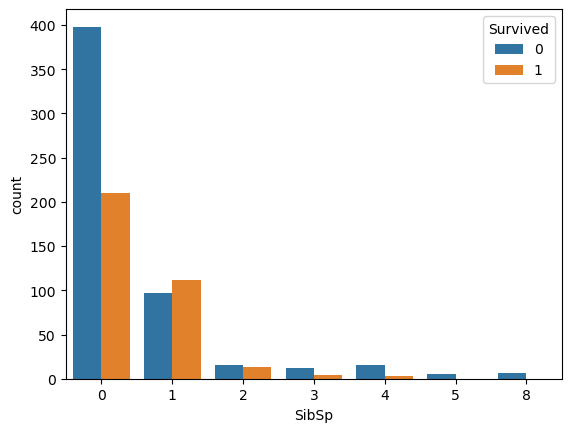

In [22]:
sns.countplot(data = train, x = 'SibSp', hue = 'Survived')

<Axes: xlabel='Parch', ylabel='count'>

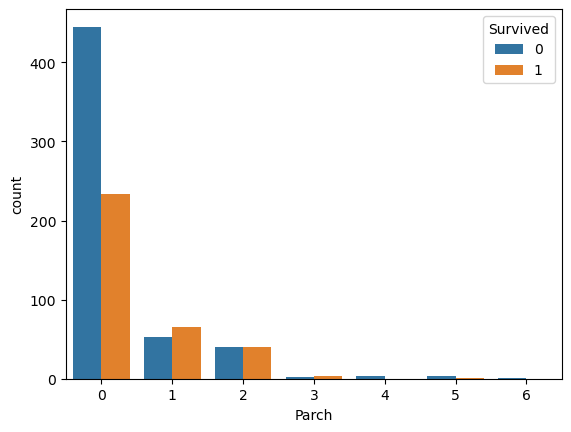

In [23]:
sns.countplot(data = train, x = 'Parch', hue = 'Survived')

In [24]:
# 특성 공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보를 추출하는 행위
# SibSp + Parch + 1 = 가족의 수
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

<Axes: xlabel='Family_Size', ylabel='count'>

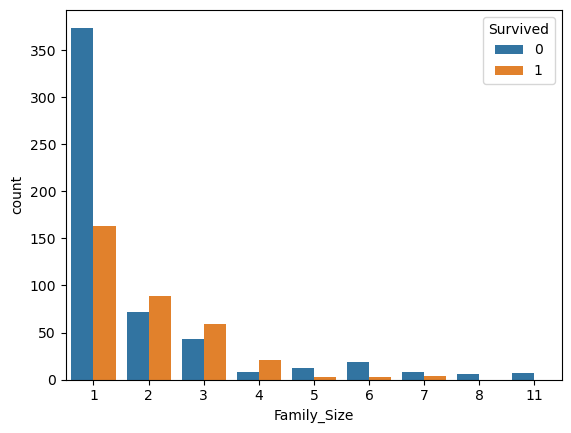

In [25]:
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')
# 1명일 때는 죽은 비율이 높다 > Alone
# 2~4명일 때는 산 비율이 높다 > Small
# 5명 이상일 때는 죽은 비율이 높다 > Large

In [26]:
# 구간 정보
b = [0,1,4,20]
# 구간에 대한 이름  
l = ['Alone', 'Small', 'Large']

In [27]:
train['Family_Group'] = pd.cut(train['Family_Size'], bins = b, labels = l)
test['Family_Group'] = pd.cut(test['Family_Size'], bins = b, labels = l)

In [28]:
train.shape, test.shape

((891, 14), (418, 13))

In [29]:
# Text 데이터
# Name, Ticket

In [30]:
train['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

In [31]:
# apply  행이나 열 단위로 복잡한 계산을 할 때 사용
# trai['Name']을 하나씩(split_name의 name 매개변수) 가져와서 적용 

In [32]:
# apply에ㅔ 적용시킬 함수
def split_name(name):
    return name.split(',')[1].split('.')[0].strip()

In [33]:
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

In [34]:
# Name 컬럼 삭제
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [35]:
train.shape, test.shape

((891, 14), (418, 13))

In [36]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
# 호칭의 종류가 많다
# 값이 하나씩인 것들이 많다
# 하나씩 값을 가진 호칭들은 other로 통일
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [38]:
convert_name_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Dr', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [39]:
train['Title'] =  train['Title'].map(convert_name_dic)

In [40]:
test['Title'] =  test['Title'].map(convert_name_dic)

In [41]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Title, dtype: int64

In [42]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [43]:
# Ticket은 공통점이 있긴하나 공통점에서 추가적인 분석을 진행하기가 힘듦
# Ticket 삭제
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [44]:
train.shape, test.shape

((891, 13), (418, 12))

In [45]:
# Passenger id는 생존에 영향을 끼치지 않으므로 삭제
train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    float64 
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Cabin         891 non-null    object  
 8   Embarked      891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Title         891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,0,3,male,22.0,1,0,7.2500,N,S,2,Small,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,1,3,female,26.0,0,0,7.9250,N,S,1,Alone,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,0,3,male,35.0,0,0,8.0500,N,S,1,Alone,Mr


In [48]:
# y_train 만들기
y_train = train['Survived']

In [49]:
train.drop('Survived', axis = 1, inplace = True)

In [50]:
train.shape, test.shape

((891, 11), (418, 11))

In [51]:
# 글자데이터를 숫자 데이터로 변경
# 원핫인코딩
feature = ['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title']

In [52]:
# 원핫인코딩시 주의사항
# 가급적이면 train과 test를 합쳐서 원핫인코딩 하기
combined = pd.concat([train,test], ignore_index=True)
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,3,male,22.0,1,0,7.2500,N,S,2,Small,Mr
1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,3,female,26.0,0,0,7.9250,N,S,1,Alone,Miss
3,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,3,male,35.0,0,0,8.0500,N,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,30.0,0,0,8.0500,N,S,1,Alone,Mr
1305,1,female,44.0,0,0,108.9000,C,C,1,Alone,Other
1306,3,male,21.5,0,0,7.2500,N,S,1,Alone,Mr
1307,3,male,34.0,0,0,8.0500,N,S,1,Alone,Mr


In [53]:
# 원핫인코딩
one_hot = pd.get_dummies(combined[feature])

In [54]:
#원핫인코딩을 할 컬럼 삭제
combined.drop(feature, axis = 1, inplace = True)

In [55]:
combined

,Pclass,Age,SibSp,Parch,Fare,Family_Size
0,3,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,2
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,2
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
1304,3,30.0,0,0,8.0500,1
1305,1,44.0,0,0,108.9000,1
1306,3,21.5,0,0,7.2500,1
1307,3,34.0,0,0,8.0500,1


In [56]:
one_hot # 원핫인코딩  한 컬럼들

,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,...,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1305,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1306,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1307,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [57]:
# 두 데이터 합치기
combined = pd.concat([combined, one_hot], axis = 1)

In [58]:
# train과 test로 분리
X_train = combined.iloc[ : 891]
X_test = combined.iloc[891 : ]

In [59]:
X_train.shape, X_test.shape, y_train.shape

((891, 30), (418, 30), (891,))

In [60]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

## 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [ ]:
# 배운 것
# KNN
# Decision Tree
# Ensemble - RandomForest
# Ensemble - AdaBoost, GradientBoost

# 배울 것
## Lasso, Ridget, Linear Regression, SVM, Logistic Regressor

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

## 6. 학습

In [ ]:
# dt.fit(X_train, y_train)

In [78]:
# 학습과 평가를 동시에 진행
from sklearn.model_selection import cross_val_score
cross_val_score(dt, X_train, y_train, cv = 5)

array([0.77094972, 0.78651685, 0.84269663, 0.75280899, 0.78089888])

In [79]:
cross_val_score(rfc, X_train, y_train, cv= 5)

array([0.79329609, 0.78089888, 0.83707865, 0.74719101, 0.83707865])

In [87]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## 7. 평가 및 예측

In [88]:
# test는 survived 컬럼이 없었음.
pre = rfc.predict(X_test)

In [89]:
# kaggle 제출용 양식에 맞추기
gender_sub = pd.read_csv('gender_submission.csv')
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [90]:
gender_sub['Survived'] = pre

In [91]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [92]:
# csv 파일로 내보내기
gender_sub.to_csv('mySub01.csv', index = False)

In [ ]:
# 1. 데이터 전처리 / 수집 다시하기
# 2. 다른 모델 사용하기 > Boost계열 모델
# 3. 하이퍼 파라미터 튜닝하기 > gridsearch